In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appliances-energy-prediction/KAG_energydata_complete.csv


- Project Name - MINI-PROJECT Group 13
- Project Type - RNN
- Contribution - Group 13
- Team Member 1 - Z

GitHub Link -
https://github.com/ 

# import library

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Scikit
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# initial setting

In [3]:
# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
# Set the plot style and display options
# plt.style.use('ggplot')
# sns.set()

# load data

In [4]:
#importing the data set
data_raw = pd.read_csv('/kaggle/input/appliances-energy-prediction/KAG_energydata_complete.csv')
#creating a copy of data set
data = data_raw.copy()

In [5]:
# Dataset First Look
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08


# explore data

## raw data

In [6]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# Missing Values/Null Values Count
data.isna().sum()
# no missing values/null values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
# Dataset Describe
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00
mean,97.69,3.80,21.69,40.26,20.34,40.42,22.27,39.24,20.86,39.03,19.59,50.95,7.91,54.61,20.27,35.39,22.03,42.94,19.49,41.55,7.41,755.52,79.75,4.04,38.33,3.76,24.99,24.99
std,102.52,7.94,1.61,3.98,2.19,4.07,2.01,3.25,2.04,4.34,1.84,9.02,6.09,31.15,2.11,5.11,1.96,5.22,2.01,4.15,5.32,7.40,14.90,2.45,11.79,4.19,14.50,14.50
min,10.00,0.00,16.79,27.02,16.10,20.46,17.20,28.77,15.10,27.66,15.33,29.82,-6.07,1.00,15.39,23.20,16.31,29.60,14.89,29.17,-5.00,729.30,24.00,0.00,1.00,-6.60,0.01,0.01
25%,50.00,0.00,20.76,37.33,18.79,37.90,20.79,36.90,19.53,35.53,18.28,45.40,3.63,30.02,18.70,31.50,20.79,39.07,18.00,38.50,3.67,750.93,70.33,2.00,29.00,0.90,12.50,12.50
50%,60.00,0.00,21.60,39.66,20.00,40.50,22.10,38.53,20.67,38.40,19.39,49.09,7.30,55.29,20.03,34.86,22.10,42.38,19.39,40.90,6.92,756.10,83.67,3.67,40.00,3.43,24.90,24.90
75%,100.00,0.00,22.60,43.07,21.50,43.26,23.29,41.76,22.10,42.16,20.62,53.66,11.26,83.23,21.60,39.00,23.39,46.54,20.60,44.34,10.41,760.93,91.67,5.50,40.00,6.57,37.58,37.58
max,1080.00,70.00,26.26,63.36,29.86,56.03,29.24,50.16,26.20,51.09,25.80,96.32,28.29,99.90,26.00,51.40,27.23,58.78,24.50,53.33,26.10,772.30,100.00,14.00,66.00,15.50,50.00,50.00


In [10]:
data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [11]:
data.date.value_counts()

date
2016-01-11 17:00:00    1
2016-04-12 01:30:00    1
2016-04-12 02:40:00    1
2016-04-12 02:30:00    1
2016-04-12 02:20:00    1
                      ..
2016-02-26 09:10:00    1
2016-02-26 09:00:00    1
2016-02-26 08:50:00    1
2016-02-26 08:40:00    1
2016-05-27 18:00:00    1
Name: count, Length: 19735, dtype: int64

## after data preparing

In [12]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10
19731,2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28
19732,2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20
19733,2016-05-27 17:50:00,420,10,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,23.20,52.20,22.43,1.00,24.50,44.30,24.66,49.52,23.20,46.82,22.33,755.20,56.67,3.83,26.17,13.23,6.32,6.32


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [14]:
data.describe(percentiles=[0.05,0.25,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Appliances,19735.00,97.69,102.52,10.00,30.00,50.00,60.00,100.00,330.00,1080.00
lights,19735.00,3.80,7.94,0.00,0.00,0.00,0.00,0.00,20.00,70.00
T1,19735.00,21.69,1.61,16.79,19.10,20.76,21.60,22.60,24.73,26.26
RH_1,19735.00,40.26,3.98,27.02,34.70,37.33,39.66,43.07,47.33,63.36
T2,19735.00,20.34,2.19,16.10,17.32,18.79,20.00,21.50,24.56,29.86
RH_2,19735.00,40.42,4.07,20.46,33.43,37.90,40.50,43.26,46.66,56.03
T3,19735.00,22.27,2.01,17.20,19.50,20.79,22.10,23.29,26.20,29.24
RH_3,19735.00,39.24,3.25,28.77,34.76,36.90,38.53,41.76,45.09,50.16
T4,19735.00,20.86,2.04,15.10,17.79,19.53,20.67,22.10,24.50,26.20
RH_4,19735.00,39.03,4.34,27.66,33.00,35.53,38.40,42.16,46.79,51.09


# data preparing

## data encoding/labeling

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['date_labelencoder']= label_encoder.fit_transform(data['date'])
# data['time_date'] = pd.to_datetime(data['date']).apply(lambda x: x.value/10**9)

## add columns

In [16]:
#creating new features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week_number'] = data['date'].dt.isocalendar().week
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.dayofweek

# df['weekday'] = df['date'].dt.day_name()  # or use df['date'].dt.day_name() 


## data filtering/cleaning

In [17]:
# drop date column
data = data.drop(columns=['date'])

## Correlation Heatmap

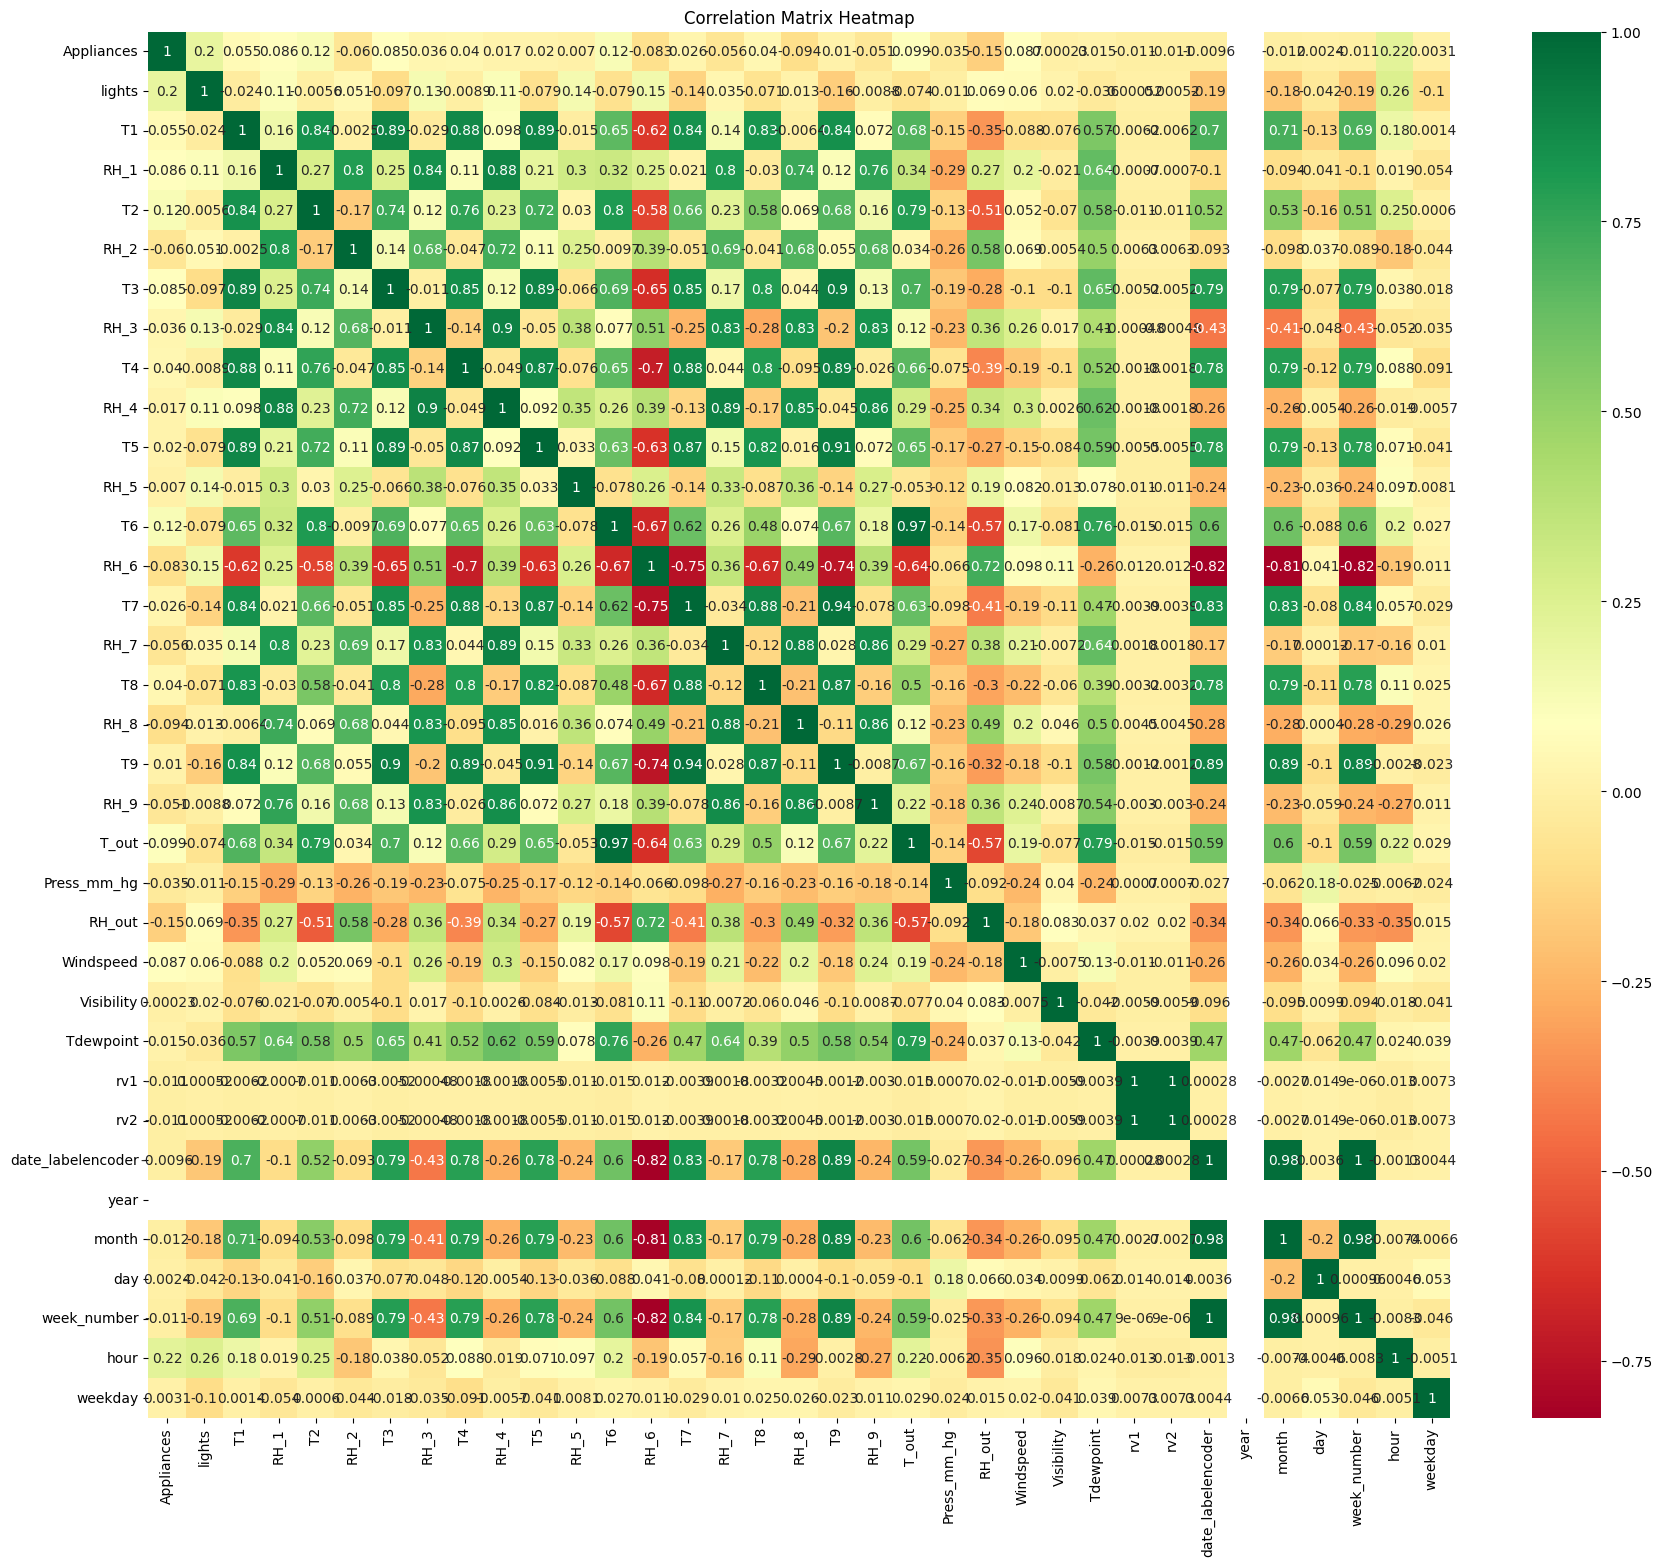

In [18]:
# Correlation Heatmap visualization code
correlation_matrix = data.corr()
plt.figure(figsize=(21, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
data.corr().Appliances.sort_values(ascending=False) 

Appliances           1.00
hour                 0.22
lights               0.20
T2                   0.12
T6                   0.12
T_out                0.10
Windspeed            0.09
RH_1                 0.09
T3                   0.09
T1                   0.06
T4                   0.04
T8                   0.04
RH_3                 0.04
T7                   0.03
T5                   0.02
RH_4                 0.02
Tdewpoint            0.02
T9                   0.01
RH_5                 0.01
weekday              0.00
day                  0.00
Visibility           0.00
date_labelencoder   -0.01
rv1                 -0.01
rv2                 -0.01
week_number         -0.01
month               -0.01
Press_mm_hg         -0.03
RH_9                -0.05
RH_7                -0.06
RH_2                -0.06
RH_6                -0.08
RH_8                -0.09
RH_out              -0.15
year                  NaN
Name: Appliances, dtype: float64

## feature engineering

### feature selection

#### 1. variance threshold

In [20]:
data.var()

Appliances             10511.35
lights                    62.98
T1                         2.58
RH_1                      15.83
T2                         4.81
RH_2                      16.56
T3                         4.02
RH_3                      10.59
T4                         4.17
RH_4                      18.85
T5                         3.40
RH_5                      81.40
T6                        37.09
RH_6                     970.31
T7                         4.45
RH_7                      26.16
T8                         3.83
RH_8                      27.29
T9                         4.06
RH_9                      17.23
T_out                     28.27
Press_mm_hg               54.75
RH_out                   222.04
Windspeed                  6.01
Visibility               139.12
Tdewpoint                 17.60
rv1                      210.15
rv2                      210.15
date_labelencoder   32457496.67
year                       0.00
month                      1.79
day     

In [21]:
(data.var()/data.mean()).sort_values(ascending=False)

date_labelencoder   3289.50
Appliances           107.59
RH_6                  17.77
lights                16.57
rv2                    8.41
rv1                    8.41
T6                     4.69
Tdewpoint              4.68
day                    4.45
hour                   4.17
T_out                  3.81
Visibility             3.63
week_number            2.81
RH_out                 2.78
RH_5                   1.60
Windspeed              1.49
weekday                1.32
RH_7                   0.74
RH_8                   0.64
month                  0.58
RH_4                   0.48
RH_9                   0.41
RH_2                   0.41
RH_1                   0.39
RH_3                   0.27
T2                     0.24
T7                     0.22
T9                     0.21
T4                     0.20
T3                     0.18
T8                     0.17
T5                     0.17
T1                     0.12
Press_mm_hg            0.07
year                   0.00
dtype: float64

In [22]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_var0 = selector.fit_transform(data)

In [23]:
X_var0.shape

(19735, 34)

In [24]:
pd.DataFrame(X_var0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,60.00,30.00,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28,0.00,1.00,11.00,2.00,17.00,0.00
1,60.00,30.00,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61,1.00,1.00,11.00,2.00,17.00,0.00
2,50.00,30.00,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64,2.00,1.00,11.00,2.00,17.00,0.00
3,50.00,40.00,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41,3.00,1.00,11.00,2.00,17.00,0.00
4,60.00,40.00,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08,4.00,1.00,11.00,2.00,17.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.00,0.00,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10,19730.00,5.00,27.00,21.00,17.00,4.00
19731,90.00,0.00,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28,19731.00,5.00,27.00,21.00,17.00,4.00
19732,270.00,10.00,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20,19732.00,5.00,27.00,21.00,17.00,4.00
19733,420.00,10.00,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,23.20,52.20,22.43,1.00,24.50,44.30,24.66,49.52,23.20,46.82,22.33,755.20,56.67,3.83,26.17,13.23,6.32,6.32,19733.00,5.00,27.00,21.00,17.00,4.00


#### 2. Chi-Square

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [26]:
data_MinMaxscaled = MinMaxScaler().fit_transform(data)
chivalue, pvalues_chi = chi2(pd.DataFrame(data_MinMaxscaled).iloc[:,2:],data.iloc[:,0:1])

In [27]:
pvalues_chi

array([1.76911228e-002, 1.00000000e+000, 1.83327129e-005, 1.00000000e+000,
       1.81199465e-002, 1.00000000e+000, 6.67341270e-003, 1.00000000e+000,
       8.84968553e-004, 1.00000000e+000, 3.29611453e-002, 2.69898999e-027,
       8.90944053e-005, 9.99999834e-001, 1.23705549e-005, 7.16069004e-001,
       5.43092745e-006, 9.98514638e-001, 2.52343201e-001, 1.00000000e+000,
       5.00503164e-001, 9.99930647e-001, 1.00000000e+000, 9.99998760e-001,
       1.00000000e+000, 1.00000000e+000, 1.58993383e-019,             nan,
       1.37588658e-032, 1.00000000e+000, 4.80907624e-022, 3.67854943e-111,
       9.99990544e-001])

In [28]:
pd.DataFrame({'pvalues_chi': pvalues_chi, 'Column2': data.columns[2:], 'p > 0.05': (pvalues_chi > 0.05)})

,pvalues_chi,Column2,p > 0.05
0,0.02,T1,False
1,1.00,RH_1,True
2,0.00,T2,False
3,1.00,RH_2,True
4,0.02,T3,False
5,1.00,RH_3,True
6,0.01,T4,False
7,1.00,RH_4,True
8,0.00,T5,False
9,1.00,RH_5,True


In [29]:
df_chi = pd.DataFrame({'pvalues_chi': pvalues_chi, 'Column2': data.columns[2:], 'p > 0.05': (pvalues_chi > 0.05)})
df_chi.loc[df_chi['pvalues_chi']<=0.05]

,pvalues_chi,Column2,p > 0.05
0,0.02,T1,False
2,0.00,T2,False
4,0.02,T3,False
6,0.01,T4,False
8,0.00,T5,False
10,0.03,T6,False
11,0.00,RH_6,False
12,0.00,T7,False
14,0.00,T8,False
16,0.00,T9,False


#### comments: when pvalues_chi > 0.05, that means the feature is not related to the target, i.e. Appliances           

#### 3. ANOVA

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PowerTransformer

In [31]:
power_transformed = pd.DataFrame(PowerTransformer().fit_transform(data))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>],
       [<Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>

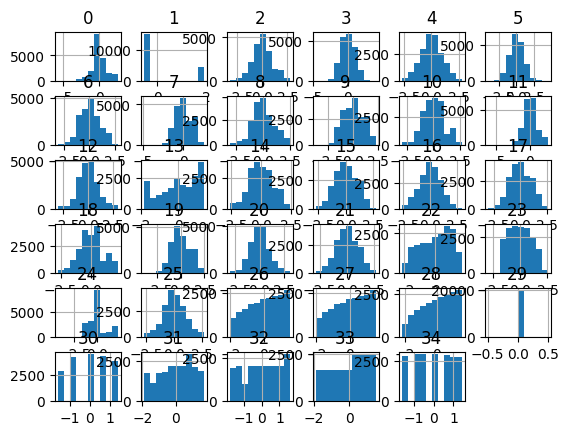

In [32]:
power_transformed.hist()

In [33]:
fvalue, pvalues_f = f_regression(pd.DataFrame(PowerTransformer().fit_transform(data)).iloc[:,2:],pd.DataFrame(PowerTransformer().fit_transform(data)).iloc[:,0:1])

In [34]:
pd.DataFrame({'pvalues_f': pvalues_f, 'Column2': data.columns[2:], 'p > 0.05': (pvalues_f > 0.05)})

,pvalues_f,Column2,p > 0.05
0,0.00,T1,False
1,0.00,RH_1,False
2,0.00,T2,False
3,0.00,RH_2,False
4,0.00,T3,False
5,0.00,RH_3,False
6,0.00,T4,False
7,0.00,RH_4,False
8,0.00,T5,False
9,0.00,RH_5,False


#### comments: when pvalues_f > 0.05, that means the feature is not linearly related to the target, i.e. Appliances  

Visibility, rv1, rv2, year

In [35]:
from sklearn.feature_selection import mutual_info_regression


In [36]:
MIR = mutual_info_regression(data.iloc[:,2:],data.iloc[:,0:1])

In [37]:
pd.DataFrame({'MIR': MIR, 'Column2': data.columns[2:], 'MIR <= 0.0': (MIR <= 0.0)})

,MIR,Column2,MIR <= 0.0
0,0.10,T1,False
1,0.09,RH_1,False
2,0.10,T2,False
3,0.07,RH_2,False
4,0.10,T3,False
5,0.08,RH_3,False
6,0.11,T4,False
7,0.07,RH_4,False
8,0.11,T5,False
9,0.07,RH_5,False


#### comments: when mutual_info_regression <= 0, that means the feature is related to the target, i.e. Appliances  
features to be removed: rv1, rv2, year

#### 4. embedded

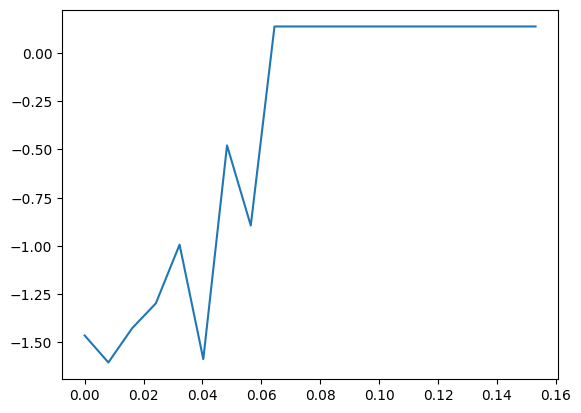

In [38]:
#RF
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
X = data.iloc[:,2:]
y = data.iloc[:,0:1]
RFR_ = RFR(n_estimators = 10, random_state = 0)
RFR_.fit(X,y).feature_importances_
threshold = np.linspace(0,(RFR_.fit(X,y).feature_importances_).max(),20)
score = list()
for _ in threshold:
    X_embedded = SelectFromModel(RFR_,threshold=_).fit_transform(X,y)
    once = cross_val_score(RFR_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

## preprocessing, standariztion

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

# modeling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.model_selection import cross_val_score

In [21]:
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_labelencoder,year,month,day,week_number,hour,weekday
0,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28,0,2016,1,11,2,17,0
1,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61,1,2016,1,11,2,17,0
2,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64,2,2016,1,11,2,17,0
3,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41,3,2016,1,11,2,17,0
4,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08,4,2016,1,11,2,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10,19730,2016,5,27,21,17,4
19731,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28,19731,2016,5,27,21,17,4
19732,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20,19732,2016,5,27,21,17,4
19733,420,10,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,23.20,52.20,22.43,1.00,24.50,44.30,24.66,49.52,23.20,46.82,22.33,755.20,56.67,3.83,26.17,13.23,6.32,6.32,19733,2016,5,27,21,17,4


In [42]:
pd.DataFrame(data_scale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.37,3.30,-1.12,1.84,-0.52,1.07,-1.24,1.69,-0.91,1.51,-1.31,0.47,-0.15,0.95,-1.45,1.22,-1.96,1.14,-1.22,0.96,-0.15,-2.98,0.82,1.21,2.09,0.37,-0.81,-0.81,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
1,-0.37,3.30,-1.12,1.62,-0.52,1.06,-1.24,1.70,-0.91,1.60,-1.31,0.47,-0.18,0.95,-1.45,1.21,-1.96,1.13,-1.20,0.97,-0.17,-2.96,0.82,1.07,1.77,0.34,-0.44,-0.44,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
2,-0.47,3.30,-1.12,1.52,-0.52,1.03,-1.24,1.75,-0.94,1.58,-1.31,0.46,-0.22,0.92,-1.45,1.18,-1.96,1.11,-1.23,0.95,-0.20,-2.95,0.82,0.94,1.44,0.32,0.25,0.25,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
3,-0.47,4.56,-1.12,1.46,-0.52,1.02,-1.24,1.77,-0.96,1.54,-1.31,0.46,-0.24,0.93,-1.49,1.15,-2.01,1.08,-1.23,0.93,-0.22,-2.94,0.82,0.80,1.12,0.30,1.41,1.41,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
4,-0.37,4.56,-1.12,1.53,-0.52,1.01,-1.24,1.77,-0.96,1.50,-1.30,0.46,-0.25,0.97,-1.45,1.14,-2.01,1.08,-1.23,0.93,-0.24,-2.92,0.82,0.66,0.79,0.27,-1.03,-1.03,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.02,-0.48,2.42,1.58,2.53,0.39,2.46,0.59,1.88,1.51,1.96,0.16,2.77,-1.72,2.01,1.78,1.37,1.37,1.84,1.26,2.88,-0.04,-1.62,-0.29,-1.24,2.28,1.25,1.25,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19731,-0.08,-0.48,2.37,1.57,2.47,0.41,2.43,0.61,1.88,1.51,1.97,0.15,2.67,-1.72,2.03,1.76,1.37,1.31,1.84,1.26,2.86,-0.04,-1.59,-0.22,-1.17,2.27,1.68,1.68,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19732,1.68,0.78,2.37,1.59,2.41,0.58,2.38,0.75,1.88,1.54,1.97,0.15,2.58,-1.72,2.03,1.76,1.37,1.29,1.84,1.26,2.83,-0.04,-1.57,-0.15,-1.10,2.27,0.29,0.29,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19733,3.14,0.78,2.37,1.69,2.31,0.64,2.30,0.63,1.88,1.56,1.96,0.14,2.38,-1.72,2.01,1.74,1.35,1.26,1.84,1.27,2.81,-0.04,-1.55,-0.08,-1.03,2.26,-1.29,-1.29,1.73,0.00,1.42,1.29,1.70,0.79,0.52


In [19]:
X = data.iloc[:,2:]
y = data.iloc[:,0:1]
X = pd.DataFrame(data_scale).iloc[:,2:].astype(float)
y = pd.DataFrame(data_scale).iloc[:,0:1].astype(float)

In [44]:
X

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-1.12,1.84,-0.52,1.07,-1.24,1.69,-0.91,1.51,-1.31,0.47,-0.15,0.95,-1.45,1.22,-1.96,1.14,-1.22,0.96,-0.15,-2.98,0.82,1.21,2.09,0.37,-0.81,-0.81,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
1,-1.12,1.62,-0.52,1.06,-1.24,1.70,-0.91,1.60,-1.31,0.47,-0.18,0.95,-1.45,1.21,-1.96,1.13,-1.20,0.97,-0.17,-2.96,0.82,1.07,1.77,0.34,-0.44,-0.44,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
2,-1.12,1.52,-0.52,1.03,-1.24,1.75,-0.94,1.58,-1.31,0.46,-0.22,0.92,-1.45,1.18,-1.96,1.11,-1.23,0.95,-0.20,-2.95,0.82,0.94,1.44,0.32,0.25,0.25,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
3,-1.12,1.46,-0.52,1.02,-1.24,1.77,-0.96,1.54,-1.31,0.46,-0.24,0.93,-1.49,1.15,-2.01,1.08,-1.23,0.93,-0.22,-2.94,0.82,0.80,1.12,0.30,1.41,1.41,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
4,-1.12,1.53,-0.52,1.01,-1.24,1.77,-0.96,1.50,-1.30,0.46,-0.25,0.97,-1.45,1.14,-2.01,1.08,-1.23,0.93,-0.24,-2.92,0.82,0.66,0.79,0.27,-1.03,-1.03,-1.73,0.00,-1.57,-0.60,-1.66,0.79,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2.42,1.58,2.53,0.39,2.46,0.59,1.88,1.51,1.96,0.16,2.77,-1.72,2.01,1.78,1.37,1.37,1.84,1.26,2.88,-0.04,-1.62,-0.29,-1.24,2.28,1.25,1.25,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19731,2.37,1.57,2.47,0.41,2.43,0.61,1.88,1.51,1.97,0.15,2.67,-1.72,2.03,1.76,1.37,1.31,1.84,1.26,2.86,-0.04,-1.59,-0.22,-1.17,2.27,1.68,1.68,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19732,2.37,1.59,2.41,0.58,2.38,0.75,1.88,1.54,1.97,0.15,2.58,-1.72,2.03,1.76,1.37,1.29,1.84,1.26,2.83,-0.04,-1.57,-0.15,-1.10,2.27,0.29,0.29,1.73,0.00,1.42,1.29,1.70,0.79,0.52
19733,2.37,1.69,2.31,0.64,2.30,0.63,1.88,1.56,1.96,0.14,2.38,-1.72,2.01,1.74,1.35,1.26,1.84,1.27,2.81,-0.04,-1.55,-0.08,-1.03,2.26,-1.29,-1.29,1.73,0.00,1.42,1.29,1.70,0.79,0.52


In [45]:
y

,0
0,-0.37
1,-0.37
2,-0.47
3,-0.47
4,-0.37
...,...
19730,0.02
19731,-0.08
19732,1.68
19733,3.14


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## KNN

In [24]:
# %%timeit
# cross_val_score(KNN(),X,y,cv=5).mean()
regr = KNN().fit(X_train, y_train)
regr.score(X_test, y_test)

0.34559682572598416

In [25]:
regr = KNN().fit(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
y_pred = regr.predict(X_test)
#calculating the training accuracy
print("Test score:" ,test_score)
#calculating the MSE
MSE  = mean_squared_error((y_test),(y_pred))
print("Test MSE :" , MSE)
#calculating the testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 :" ,r2)

Test score: 0.34559682572598416
Test MSE : 0.6184816746503782
Test R2 : 0.34559682572598416


## linear regression

In [70]:
regr = LinearRegression().fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.16014803905927233 Test score: 0.13973598079550753
Train R2 : 0.16014803905927233 Test R2 : 0.13973598079550753
Test MSE : 0.8130424058980391


## RF

In [ ]:
# cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()
regr = RFC(n_estimators=10,random_state=0).fit(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
y_pred = regr.predict(X_test)
print("Test score:" ,test_score)
MSE  = mean_squared_error((y_test),(y_pred))
print("Test MSE :" , MSE)
r2 = r2_score((y_test),(y_pred))
print("Test R2 :" ,r2)

In [71]:
regr = RFR(n_estimators=20,random_state=42).fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.9291964546999272 Test score: 0.5670100185442304
Train R2 : 0.9291964546999272 Test R2 : 0.5670100185442304
Test MSE : 0.40922229500902024


###  Cross- Validation & Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,50,100,200],  # You can specify other values
    'max_depth': [None, 10, 20],     # Example values for the maximum depth of each tree
    'min_samples_split': [ 5, 10] # Example values for the minimum samples required to split an internal node
}
grid_search = GridSearchCV(RFR(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Create an XGBoost Regressor model with the best hyperparameters
regr = RFR(**best_params, random_state=42).fit(X_train, y_train)

train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Train score: 0.906972479215556 Test score: 0.5813514278322237
Train R2 : 0.906972479215556 Test R2 : 0.5813514278322237
Test MSE : 0.39566811437240473


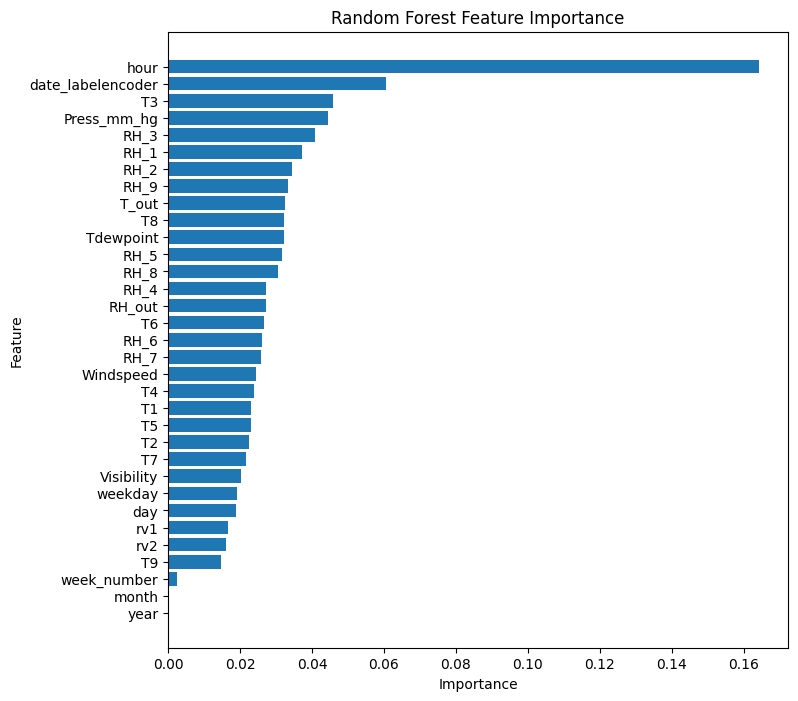

In [50]:
importance_scores = regr.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': data.columns[2:],
    'Importance': importance_scores
})

# Sort DataFrame by importance scores
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])  # Use barh for horizontal bar chart
plt.ylabel('Feature')  # Switch y-axis label to 'Feature'
plt.xlabel('Importance')  # Switch x-axis label to 'Importance'
plt.title('Random Forest Feature Importance')

plt.show()

#variance threshold
T4                     0.20
T3                     0.18
T8                     0.17
T5                     0.17
T1                     0.12
Press_mm_hg            0.07
year                   0.00

## GraidentBoost

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.36598419978226193 Test score: 0.29752019492616233
Train R2 : 0.36598419978226193 Test R2 : 0.29752019492616233
Test MSE : 0.6639192829896237


## XGBOOST

In [52]:
import xgboost as xgb
regr =  xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42).fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.6538385652246583 Test score: 0.4440705450812793
Train R2 : 0.6538385652246583 Test R2 : 0.4440705450812793
Test MSE : 0.5254133747854205


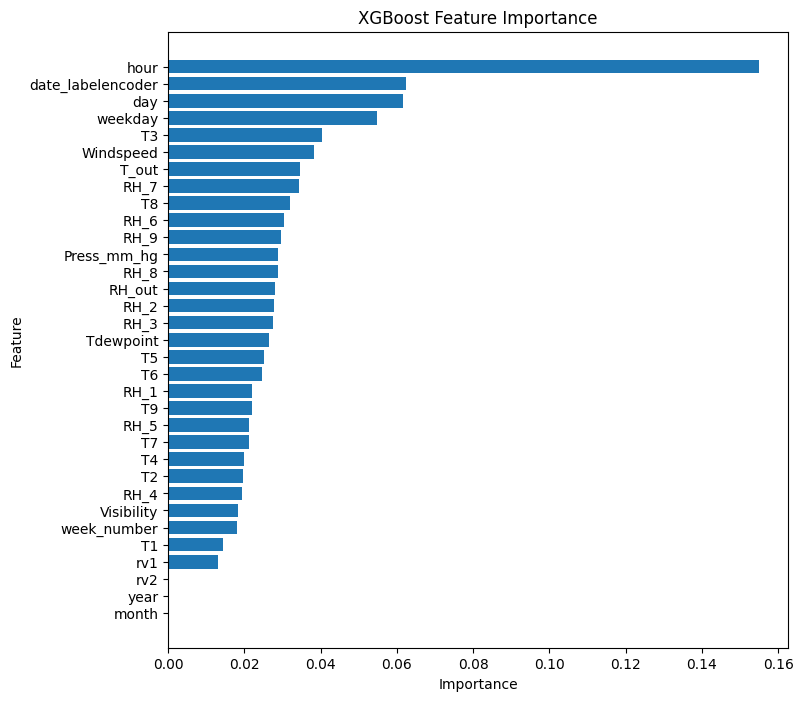

In [53]:
importance_scores = regr.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': data.columns[2:],
    'Importance': importance_scores
})

# # Plot the feature importance
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)
# feature_importance_df.plot(x='Feature', y='Importance', kind='bar', legend=False)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.title('XGBoost Feature Importance')
# plt.xticks(rotation=90) 
# plt.show()

fig, ax = plt.subplots(figsize=(8,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])  # Use barh for horizontal bar chart
plt.ylabel('Feature')  # Switch y-axis label to 'Feature'
plt.xlabel('Importance')  # Switch x-axis label to 'Importance'
plt.title('XGBoost Feature Importance')
plt.show()

###  Cross- Validation & Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,50,100,200,300],  # You can specify other values
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],  # Learning rate
}
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Create an XGBoost Regressor model with the best hyperparameters
regr = xgb.XGBRegressor(**best_params, random_state=42).fit(X_train, y_train)

train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 300}
Train score: 0.943008277154691 Test score: 0.5638384146709186
Train R2 : 0.943008277154691 Test R2 : 0.5638384146709186
Test MSE : 0.41221980319970053


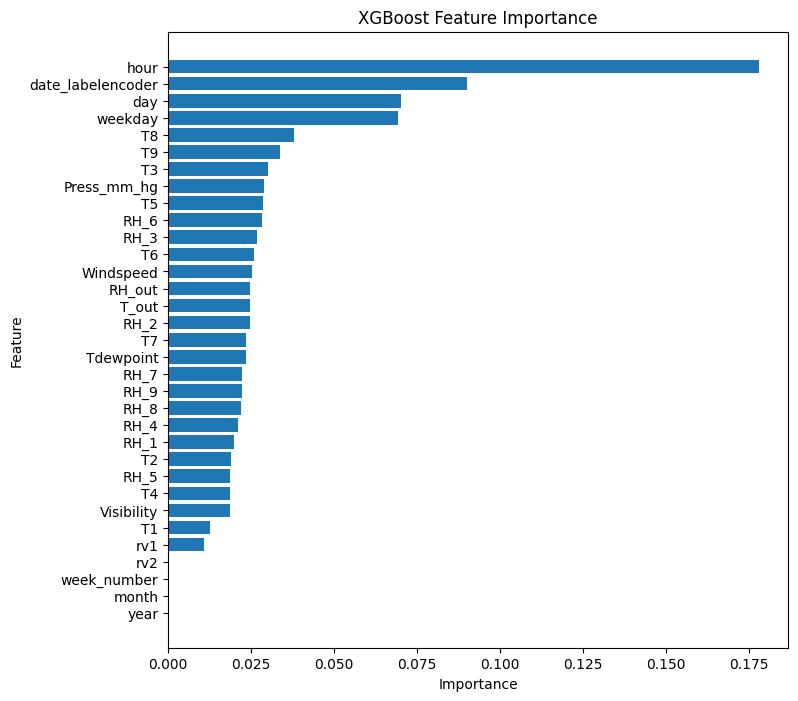

In [55]:
importance_scores = regr.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': data.columns[2:],
    'Importance': importance_scores
})

# Sort DataFrame by importance scores
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])  # Use barh for horizontal bar chart
plt.ylabel('Feature')  # Switch y-axis label to 'Feature'
plt.xlabel('Importance')  # Switch x-axis label to 'Importance'
plt.title('XGBoost Feature Importance')

plt.show()

#variance threshold
T4                     0.20
T3                     0.18
T8                     0.17
T5                     0.17
T1                     0.12
Press_mm_hg            0.07
year                   0.00

## MLP

In [26]:
regr = MLPR(hidden_layer_sizes=(30,30),random_state=42, max_iter=500).fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.5164463490038722 Test score: 0.3733995286224908
Train R2 : 0.5164463490038722 Test R2 : 0.3733995286224908
Test MSE : 0.5922051177459672


In [28]:
regr = MLPR(hidden_layer_sizes=(50,50),random_state=42, max_iter=500).fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.5250157466427547 Test score: 0.36751262955213804
Train R2 : 0.5250157466427547 Test R2 : 0.36751262955213804
Test MSE : 0.5977688731473201


###  Cross- Validation & Hyperparameter Tuning

In [26]:
# Define the parameter grid with two hidden layers
param_grid = {
    'hidden_layer_sizes': [(10, 10), (50, 20), (30, 30), (100, 50), (100, 100)],  # Two hidden layers with different sizes
    'activation': ['relu'],
    'alpha': [ 0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    # Add more hyperparameters as needed
}

# Create an MLP Regressor
mlp_model = MLPR()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive'}
Best Score:  -0.6078076671234682


In [27]:
regr = MLPR(hidden_layer_sizes=(100,100),random_state=42,max_iter=500,alpha=0.05,learning_rate='adaptive').fit(X_train, y_train)
train_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
#predicting the value
train_predictions = regr.predict(X_train)
test_predictions = regr.predict(X_test)
print("Train score:" ,train_score,"Test score:" ,test_score)
train_r2 = r2_score((y_train),(train_predictions))
test_r2 = r2_score((y_test),(test_predictions))
print("Train R2 :" ,train_r2, "Test R2 :" ,test_r2)
MSE  = mean_squared_error((y_test),(test_predictions))
print("Test MSE :" , MSE)

Train score: 0.5001320295512908 Test score: 0.3781896972661102
Train R2 : 0.5001320295512908 Test R2 : 0.3781896972661102
Test MSE : 0.5876778910437891


## deep learning model


In [104]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


### CNN

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [180]:
# Reshape X_train to [num_samples, 1, num_features]

X_train_array = X_train.to_numpy()
X_train_array = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_train_tensor = torch.Tensor(X_train_array)
y_train_tensor = torch.Tensor(y_train.to_numpy())
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

X_test_array = X_test.to_numpy()
X_test_array = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])
X_test_tensor = torch.Tensor(X_test_array)
y_test_tensor = torch.Tensor(y_test.to_numpy())
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [181]:
class SimpleCNNRegression(nn.Module):
    def __init__(self, num_output_channels):
        super(SimpleCNNRegression, self).__init__()
        
#         self.conv1 = nn.Conv2d(1, 64, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_output_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        
        return x



In [183]:
model = SimpleCNNRegression(num_output_channels=1)
model.to(device)
criterion = nn.MSELoss()
# critereon = nn.SmoothL1Loss()
 
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-2)
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


num_epochs = 500
best_val_loss = 1
train_losses = list()
val_losses = list()

for epoch in range(num_epochs):
    # Training loop
    train_loss = 0.0
    for inputs, targets in train_loader: 
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, targets.to(device))
        loss.backward()
        optimizer.step()
        train_loss += criterion(outputs, targets.to(device)).item()
    avg_train_loss = train_loss / len(train_loader)
    # Validation loss 
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model(inputs.to(device))
            val_loss += criterion(outputs, targets.to(device)).item()
        avg_val_loss = val_loss / len(val_loader)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')       
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    if epoch > 1 and avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model
        print('best model update')

Epoch [1/500], Loss: 1.0005, Val Loss: 0.9063
Epoch [2/500], Loss: 0.9769, Val Loss: 0.8838
Epoch [3/500], Loss: 0.9513, Val Loss: 0.8641
best model update
Epoch [4/500], Loss: 0.9281, Val Loss: 0.8491
best model update
Epoch [5/500], Loss: 0.9134, Val Loss: 0.8380
best model update
Epoch [6/500], Loss: 0.8979, Val Loss: 0.8296
best model update
Epoch [7/500], Loss: 0.8899, Val Loss: 0.8233
best model update
Epoch [8/500], Loss: 0.8810, Val Loss: 0.8178
best model update
Epoch [9/500], Loss: 0.8738, Val Loss: 0.8139
best model update
Epoch [10/500], Loss: 0.8740, Val Loss: 0.8092
best model update
Epoch [11/500], Loss: 0.8666, Val Loss: 0.8067
best model update
Epoch [12/500], Loss: 0.8594, Val Loss: 0.8021
best model update
Epoch [13/500], Loss: 0.8527, Val Loss: 0.7984
best model update
Epoch [14/500], Loss: 0.8518, Val Loss: 0.7948
best model update
Epoch [15/500], Loss: 0.8443, Val Loss: 0.7913
best model update
Epoch [16/500], Loss: 0.8410, Val Loss: 0.7887
best model update
Epoch

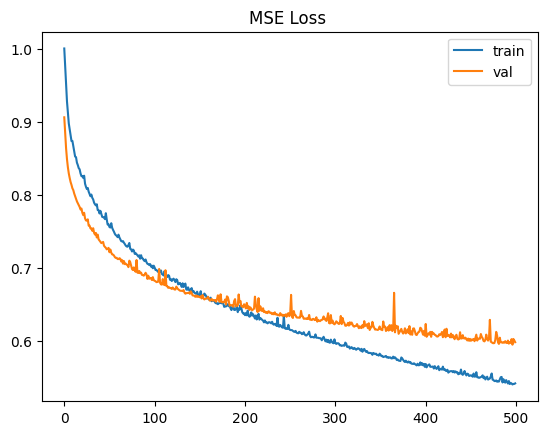

In [184]:
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.title("MSE Loss ")
plt.legend()

In [186]:
train_predictions = list()
train_targets = list()
test_predictions = list()
test_targets = list()
best_model.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        train_predictions_batch = best_model(inputs.to(device))
        train_predictions.append(train_predictions_batch)
        train_targets.append(targets.to(device))    
    for inputs, targets in val_loader:
        test_predictions_batch = best_model(inputs.to(device))
        test_predictions.append(test_predictions_batch)
        test_targets.append(targets.to(device))
        
train_predictions = torch.cat(train_predictions, dim=0)
train_targets = torch.cat(train_targets, dim=0)
test_predictions = torch.cat(test_predictions, dim=0)
test_targets = torch.cat(test_targets, dim=0)
# Calculate evaluation metrics on the entire dataset
train_mse = F.mse_loss(train_predictions, train_targets)
train_mae = F.l1_loss(train_predictions, train_targets)
train_r2 = r2_score(train_targets.detach().cpu().numpy().flatten(), train_predictions.detach().cpu().numpy().flatten())
test_mse = F.mse_loss(test_predictions, test_targets)
test_mae = F.l1_loss(test_predictions, test_targets)
test_r2 = r2_score(test_targets.detach().cpu().numpy().flatten(), test_predictions.detach().cpu().numpy().flatten())

print("Train Mean Absolute Error:", train_mae.item(), "Test Mean Absolute Error:", test_mae.item())
print("Train Mean Squared Error:", train_mse.item(), "Test Mean Squared Error:", test_mse.item())
print("Train R-squared (R2) Score:", train_r2, "Test R-squared (R2) Score:", test_r2)

Train Mean Absolute Error: 0.40120020508766174 Test Mean Absolute Error: 0.4267304241657257
Train Mean Squared Error: 0.5383397936820984 Test Mean Squared Error: 0.6015247106552124
Train R-squared (R2) Score: 0.4713152619537845 Test R-squared (R2) Score: 0.36353868990382454


In [187]:
torch.save(best_model.state_dict(), 'cnn.pt')

#### resnet18

In [122]:
class CustomDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = features
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        sample = {
            'feature': torch.Tensor(self.features.iloc[idx].values),
            'label': torch.Tensor([self.labels.iloc[idx]])
        }

        if self.transform:
            sample = self.transform(sample)

        return sample

#  
train_dataset = CustomDataset(features=X_train.reset_index(drop=True), labels=y_train.reset_index(drop=True))
test_dataset = CustomDataset(features=X_test.reset_index(drop=True), labels=y_test.reset_index(drop=True))
# Define batch size and create DataLoader
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [123]:
# Load pre-trained ResNet-18
resnet18 = models.resnet18(pretrained=True)

# Freeze all layers  
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the last layer for regression
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 1)  # Output a single regression value
resnet18.conv1 = nn.Conv2d(1, batch_size, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Print the modified ResNet-18 architecture
print(resnet18)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [126]:
model = resnet18
 
criterion = nn.MSELoss()
# critereon = nn.SmoothL1Loss()
 
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-2)
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


num_epochs = 300
best_val_loss = 1
train_losses = list()
val_losses = list()

for epoch in range(num_epochs):
    # Training loop
    train_loss = 0.0
    for batch in train_loader:
        inputs, targets = batch['feature'].to(device), batch['label'].to(device)
        inputs= inputs.view(batch_size, 1, 1, 33) # torch.Size([64, 1, 1, 33])
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += criterion(outputs, targets).item()
    avg_train_loss = train_loss / len(train_loader)
    # Validation loss 
    with torch.no_grad():
        val_loss = 0.0
        for batch in val_loader:
            inputs, targets = batch['feature'].to(device), batch['label'].to(device)
            inputs= inputs.view(batch_size, 1, 1, 33)
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()
        avg_val_loss = val_loss / len(val_loader)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')       
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    if epoch > 1 and avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model
        print('best model update')

Epoch [1/300], Loss: 1.0795, Val Loss: 1.0028
Epoch [2/300], Loss: 1.0741, Val Loss: 1.0010
Epoch [3/300], Loss: 1.0745, Val Loss: 0.9996
best model update
Epoch [4/300], Loss: 1.0758, Val Loss: 0.9982
best model update
Epoch [5/300], Loss: 1.0749, Val Loss: 0.9980
best model update
Epoch [6/300], Loss: 1.0675, Val Loss: 0.9958
best model update
Epoch [7/300], Loss: 1.0711, Val Loss: 0.9942
best model update
Epoch [8/300], Loss: 1.0709, Val Loss: 0.9935
best model update
Epoch [9/300], Loss: 1.0674, Val Loss: 0.9919
best model update
Epoch [10/300], Loss: 1.0651, Val Loss: 0.9911
best model update
Epoch [11/300], Loss: 1.0650, Val Loss: 0.9892
best model update
Epoch [12/300], Loss: 1.0626, Val Loss: 0.9882
best model update
Epoch [13/300], Loss: 1.0634, Val Loss: 0.9877
best model update
Epoch [14/300], Loss: 1.0622, Val Loss: 0.9863
best model update
Epoch [15/300], Loss: 1.0586, Val Loss: 0.9853
best model update
Epoch [16/300], Loss: 1.0589, Val Loss: 0.9861
Epoch [17/300], Loss: 1

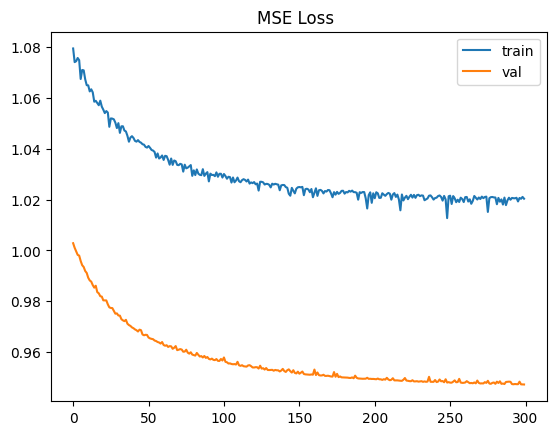

In [127]:
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.title("MSE Loss ")
plt.legend()

In [128]:
train_predictions = list()
train_targets = list()
test_predictions = list()
test_targets = list()
best_model.eval()
with torch.no_grad():
    for batch in train_loader:
        inputs, targets = batch['feature'].to(device), batch['label'].to(device)
        inputs= inputs.view(batch_size, 1, 1, 33)   
        train_predictions_batch = best_model(inputs)
        train_predictions.append(train_predictions_batch)
        train_targets.append(targets)    
    for batch in val_loader:
        inputs, targets = batch['feature'].to(device), batch['label'].to(device)
        inputs= inputs.view(batch_size, 1, 1, 33)           
        test_predictions_batch = best_model(inputs)
        test_predictions.append(test_predictions_batch)
        test_targets.append(targets)
        
train_predictions = torch.cat(train_predictions, dim=0)
train_targets = torch.cat(train_targets, dim=0)
test_predictions = torch.cat(test_predictions, dim=0)
test_targets = torch.cat(test_targets, dim=0)
# Calculate evaluation metrics on the entire dataset
train_mse = F.mse_loss(train_predictions, train_targets)
train_mae = F.l1_loss(train_predictions, train_targets)
train_r2 = r2_score(train_targets.detach().cpu().numpy().flatten(), train_predictions.detach().cpu().numpy().flatten())
test_mse = F.mse_loss(test_predictions, test_targets)
test_mae = F.l1_loss(test_predictions, test_targets)
test_r2 = r2_score(test_targets.detach().cpu().numpy().flatten(), test_predictions.detach().cpu().numpy().flatten())

print("Train Mean Absolute Error:", train_mae.item(), "Test Mean Absolute Error:", test_mae.item())
print("Train Mean Squared Error:", train_mse.item(), "Test Mean Squared Error:", test_mse.item())
print("Train R-squared (R2) Score:", train_r2, "Test R-squared (R2) Score:", test_r2)

Train Mean Absolute Error: 0.5905757546424866 Test Mean Absolute Error: 0.5822716355323792
Train Mean Squared Error: 1.0197601318359375 Test Mean Squared Error: 0.9472783207893372
Train R-squared (R2) Score: -0.001672877459275357 Test R-squared (R2) Score: -0.00014417234660379918


In [129]:
print(pd.DataFrame(test_predictions.detach().cpu().numpy().flatten()),y_test)

         0
0     0.02
1     0.04
2    -0.00
3     0.04
4     0.02
...    ...
4923  0.02
4924  0.01
4925  0.01
4926  0.02
4927 -0.03

[4928 rows x 1 columns]           0
8980  -0.56
2754  -0.08
9132  -0.47
14359 -0.47
8875  -0.27
...     ...
17496 -0.37
9282  -0.37
7471  -0.17
610   -0.17
12822  0.02

[4934 rows x 1 columns]


In [130]:
torch.save(best_model.state_dict(), 'resnet18.pt')

### not standarized data

In [ ]:
# X = data.iloc[:,2:]
# y = data.iloc[:,0:1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# todo

### LSTM

In [164]:
X_train_tensor = torch.Tensor(X_train.to_numpy())
y_train_tensor = torch.Tensor(y_train.to_numpy())
sequence_length = 10
sequences = []
labels = []

for i in range(len(X_train) - sequence_length + 1):
    seq = X_train_tensor[i:i + sequence_length]
    label = y_train_tensor[i + sequence_length - 1]
    sequences.append(seq)
    labels.append(label)

sequences_tensor = torch.stack(sequences)
labels_tensor = torch.stack(labels)

train_dataset = TensorDataset(sequences_tensor, labels_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, drop_last=True)

X_test_tensor = torch.Tensor(X_test.to_numpy())
y_test_tensor = torch.Tensor(y_test.to_numpy())
sequences_test = []
labels_test = []
for i in range(len(X_test) - sequence_length + 1):
    seq_test = X_test_tensor[i:i + sequence_length]
    label_test = y_test_tensor[i + sequence_length - 1]
    sequences_test.append(seq_test)
    labels_test.append(label_test)
sequences_test_tensor = torch.stack(sequences_test)
labels_test_tensor = torch.stack(labels_test)
test_dataset = TensorDataset(sequences_test_tensor, labels_test_tensor)
val_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, drop_last=True)

In [173]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleLSTM, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out)
        out = self.fc1(lstm_out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        return out
    

In [ ]:
model = SimpleLSTM(input_size=33, hidden_size=64, num_layers=3, output_size=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression

# Training loop
num_epochs = 1  # You can adjust this based on your training needs

for epoch in range(num_epochs):
    total_loss = 0.0

    for batch_x, batch_y in train_loader:
        # Forward pass
        output = model(batch_x)

        # Compute the loss
        loss = criterion(output, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print the average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')


In [174]:
model = SimpleLSTM(input_size=33, hidden_size=64, num_layers=5, output_size=1)
model.to(device)
criterion = nn.MSELoss()
# critereon = nn.SmoothL1Loss()
 
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-3)
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


num_epochs = 100
best_val_loss = 1
train_losses = list()
val_losses = list()

for epoch in range(num_epochs):
    # Training loop
    train_loss = 0.0
    for inputs, targets in train_loader: 
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, targets.to(device))
        loss.backward()
        optimizer.step()
        train_loss += criterion(outputs, targets.to(device)).item()
    avg_train_loss = train_loss / len(train_loader)
    # Validation loss 
    with torch.no_grad():
        val_loss = 0.0
        for inputs, targets in val_loader:
            outputs = model(inputs.to(device))
            val_loss += criterion(outputs, targets.to(device)).item()
        avg_val_loss = val_loss / len(val_loader)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')       
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    if epoch > 1 and avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model
        print('best model update')


Epoch [1/100], Loss: 1.0205, Val Loss: 0.9533
Epoch [2/100], Loss: 1.0200, Val Loss: 0.9517
Epoch [3/100], Loss: 1.0191, Val Loss: 0.9511
best model update
Epoch [4/100], Loss: 1.0186, Val Loss: 0.9506
best model update
Epoch [5/100], Loss: 1.0167, Val Loss: 0.9502
best model update
Epoch [6/100], Loss: 1.0177, Val Loss: 0.9502
best model update
Epoch [7/100], Loss: 1.0156, Val Loss: 0.9499
best model update
Epoch [8/100], Loss: 1.0166, Val Loss: 0.9498
best model update
Epoch [9/100], Loss: 1.0181, Val Loss: 0.9497
best model update
Epoch [10/100], Loss: 1.0182, Val Loss: 0.9500
Epoch [11/100], Loss: 1.0182, Val Loss: 0.9498
Epoch [12/100], Loss: 1.0169, Val Loss: 0.9495
best model update
Epoch [13/100], Loss: 1.0180, Val Loss: 0.9498
Epoch [14/100], Loss: 1.0179, Val Loss: 0.9497
Epoch [15/100], Loss: 1.0178, Val Loss: 0.9500
Epoch [16/100], Loss: 1.0177, Val Loss: 0.9497
Epoch [17/100], Loss: 1.0181, Val Loss: 0.9497
Epoch [18/100], Loss: 1.0180, Val Loss: 0.9497
Epoch [19/100], Los

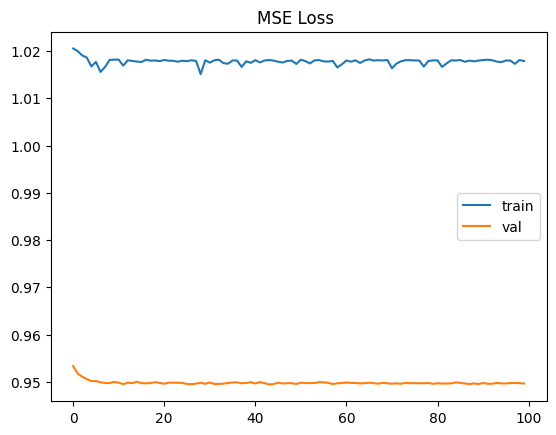

In [175]:
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.title("MSE Loss ")
plt.legend()

In [176]:
train_predictions = list()
train_targets = list()
test_predictions = list()
test_targets = list()
best_model.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        train_predictions_batch = best_model(inputs.to(device))
        train_predictions.append(train_predictions_batch)
        train_targets.append(targets.to(device))    
    for inputs, targets in val_loader:
        test_predictions_batch = best_model(inputs.to(device))
        test_predictions.append(test_predictions_batch)
        test_targets.append(targets.to(device))
        
train_predictions = torch.cat(train_predictions, dim=0)
train_targets = torch.cat(train_targets, dim=0)
test_predictions = torch.cat(test_predictions, dim=0)
test_targets = torch.cat(test_targets, dim=0)
# Calculate evaluation metrics on the entire dataset
train_mse = F.mse_loss(train_predictions, train_targets)
train_mae = F.l1_loss(train_predictions, train_targets)
train_r2 = r2_score(train_targets.detach().cpu().numpy().flatten(), train_predictions.detach().cpu().numpy().flatten())
test_mse = F.mse_loss(test_predictions, test_targets)
test_mae = F.l1_loss(test_predictions, test_targets)
test_r2 = r2_score(test_targets.detach().cpu().numpy().flatten(), test_predictions.detach().cpu().numpy().flatten())

print("Train Mean Absolute Error:", train_mae.item(), "Test Mean Absolute Error:", test_mae.item())
print("Train Mean Squared Error:", train_mse.item(), "Test Mean Squared Error:", test_mse.item())
print("Train R-squared (R2) Score:", train_r2, "Test R-squared (R2) Score:", test_r2)

Train Mean Absolute Error: 0.5936304330825806 Test Mean Absolute Error: 0.5870153307914734
Train Mean Squared Error: 1.0169028043746948 Test Mean Squared Error: 0.9496926069259644
Train R-squared (R2) Score: -4.775838140513855e-07 Test R-squared (R2) Score: -0.00013478599868022023


In [177]:
torch.save(best_model.state_dict(), 'lstm.pt')

In [178]:
1

1